# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Barcode Generation and Reading</h2>

<h5 style="margin-top:5px;">In this lesson we'll create barcodes of various standards as well as reading what's on them.</h5>

In [2]:
# Our Setup, Import Libraries and Create our Imshow Function

!pip install python-barcode[images]
!pip install qrcode
!sudo apt install libzbar0
!pip install pyzbar

import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

[sudo] password for robin: 
sudo: a password is required
^C


### **Barcodes Generation** ###
##### Let's generate barcodes using our python-barcode package.
Supported Formats At the time of this writing, this package supports the following formats:

1. EAN-8
2. EAN-13
3. EAN-14
4. UPC-A
5. JAN
6. ISBN-10
7. ISBN-13
8. ISSN
9. Code 39
10. Code 128
11. PZN
#####

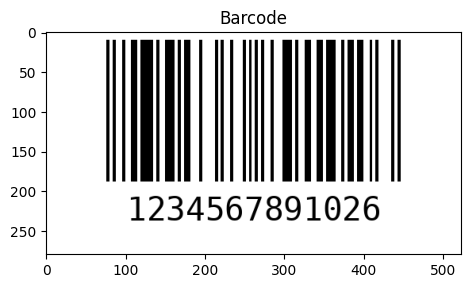

In [3]:
from barcode import EAN13
from barcode.writer import ImageWriter

with open('barcode.png', 'wb') as f:
    EAN13('123456789102', writer=ImageWriter()).write(f)

barcode = cv2.imread("barcode.png")
imshow("Barcode", barcode)

### **QR Code Generation** ###

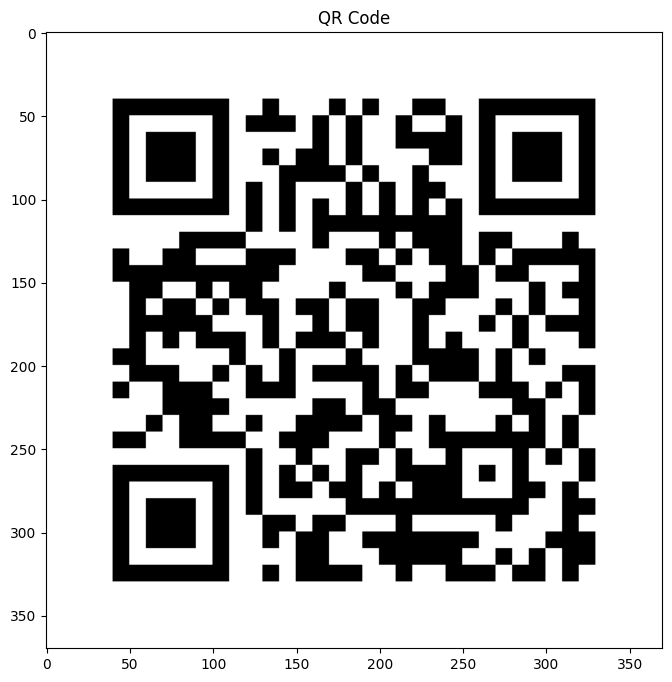

In [4]:
import qrcode
from PIL import Image

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)

qr.add_data('https://www.opencv.org')
qr.make(fit=True)
img = qr.make_image(fill_color="black", back_color="white")
img.save("qrcode.png")      

qrcode = cv2.imread("qrcode.png")
imshow("QR Code", qrcode, size = 8)

### **Decoding QR Codes** ###

In [7]:
from pyzbar.pyzbar import decode
from PIL import Image

img = Image.open("../images/qrcode.png")
result = decode(img)
for i in result:
    print(i.data.decode('utf-8'))

https://www.opencv.org


In [8]:
!wget https://i.stack.imgur.com/1DwED.jpg

--2026-01-04 21:41:46--  https://i.stack.imgur.com/1DwED.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 198.252.206.17
Connecting to i.stack.imgur.com (i.stack.imgur.com)|198.252.206.17|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://i.sstatic.net/1DwED.jpg [following]
--2026-01-04 21:41:47--  https://i.sstatic.net/1DwED.jpg
Resolving i.sstatic.net (i.sstatic.net)... 198.252.206.17
Connecting to i.sstatic.net (i.sstatic.net)|198.252.206.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439449 (429K) [image/jpeg]
Saving to: ‘1DwED.jpg’

1DwED.jpg           100%[===================>] 429.15K  --.-KB/s    in 0.1s    

2026-01-04 21:41:47 (3.65 MB/s) - ‘1DwED.jpg’ saved [439449/439449]



### **Detecting QR Codes** ###

[Point(x=558, y=938), Point(x=588, y=1288), Point(x=916, y=1275), Point(x=875, y=896)]
QR Code revealed: http://ruthenus.pl (QRCODE)


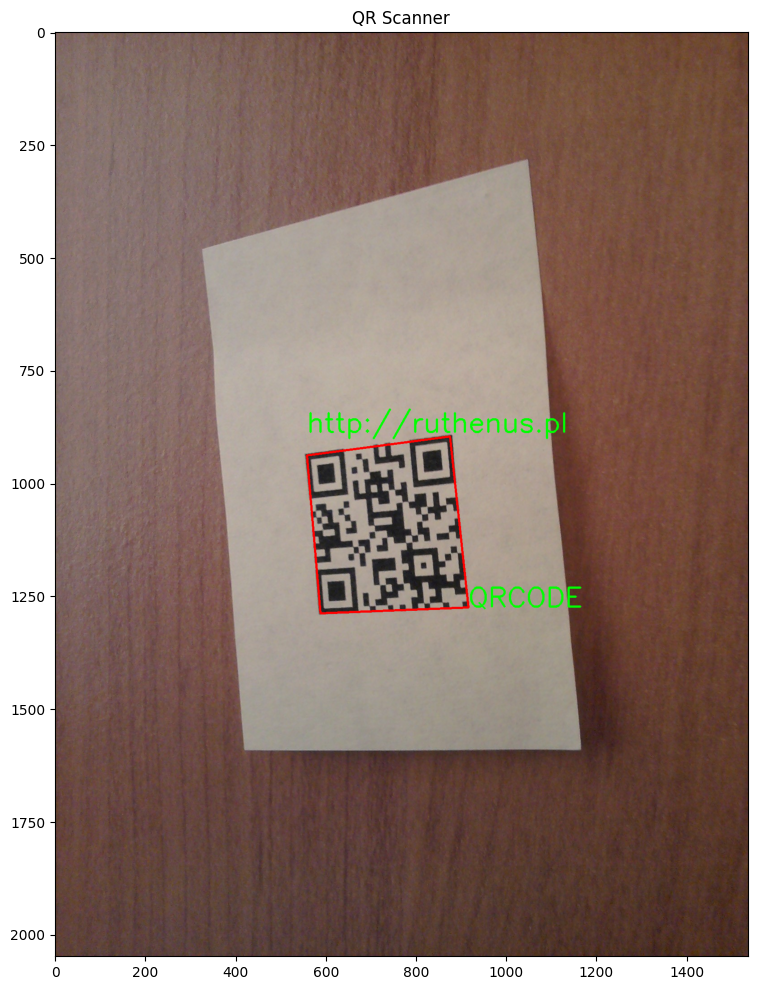

In [ ]:
from pyzbar.pyzbar import decode

image = cv2.imread("../images/1DwED.jpg")

# Detect and decode the qrcode
codes = decode(image)

# loop over the detected barcodes
for bc in codes:
   # Get the rect coordinates for our text placement
    (x, y , w, h) = bc.rect
    print(bc.polygon)
    pt1,pt2,pt3,pt4 = bc.polygon

    # Draw a bounding box over our detected QR code
    pts = np.array( [[pt1.x, pt1.y], [pt2.x, pt2.y], [pt3.x, pt3.y], [pt4.x, pt4.y]], np.int32)
    pts = pts.reshape((-1,1,2))
    cv2.polylines(image,[pts],True,(0,0,255),3)

    # extract the string info data and the type from our object
    barcode_text = bc.data.decode()
    barcode_type = bc.type

    # show our text
    text = "{} ({})".format(barcode_text, barcode_type)
    cv2.putText(image, barcode_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.putText(image, barcode_type, (x+w, y+h - 15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    print("QR Code revealed: {}".format(text))

# display our output
imshow("QR Scanner", image, size = 12)

In [15]:
!wget https://www.differencebetween.com/wp-content/uploads/2011/04/1024px-ISBN.jpg


--2026-01-04 21:57:21--  https://www.differencebetween.com/wp-content/uploads/2011/04/1024px-ISBN.jpg
Resolving www.differencebetween.com (www.differencebetween.com)... 172.67.217.144, 104.21.75.79, 2606:4700:3034::ac43:d990, ...
Connecting to www.differencebetween.com (www.differencebetween.com)|172.67.217.144|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2026-01-04 21:57:21 ERROR 403: Forbidden.



Barcode revealed: 9780863815805 (EAN13)
Barcode revealed: 9780863815805 (EAN13)


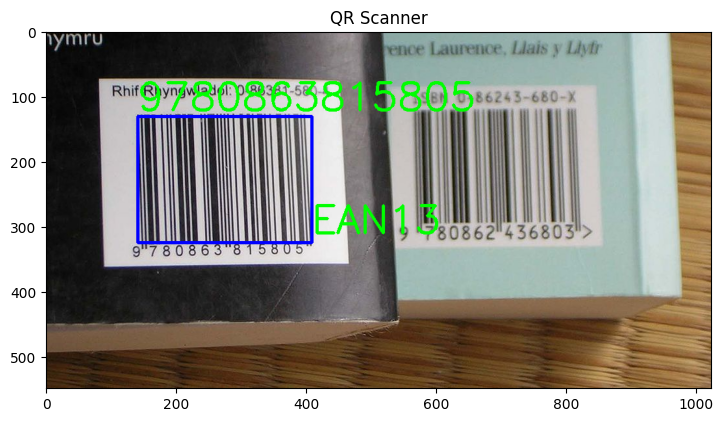

In [16]:
from pyzbar.pyzbar import decode

image = cv2.imread("../images/1024px-ISBN.jpg")

# Detect and decode the qrcode
barcodes = decode(image)

# loop over the detected barcodes
for bc in barcodes:
    # Get the rect coordinates for our text placement
    (x, y , w, h) = bc.rect
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 3)
    
    # extract the string info data and the type from our object
    barcode_text = bc.data.decode()
    barcode_type = bc.type
    
    # show our text
    text = "{} ({})".format(barcode_text, barcode_type)
    cv2.putText(image, barcode_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.putText(image, barcode_type, (x+w, y+h - 15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    print("Barcode revealed: {}".format(text))
    print("Barcode revealed: {}".format(text))

# display our output
imshow("QR Scanner", image, size = 16)